In [1]:
import pyvisa as pv
import numpy as np
import matplotlib.pyplot as plt
import sys

rm = pv.ResourceManager()
#Get the USB device, e.g. ""
instruments = rm.list_resources('?*')
usb = list(filter(lambda x: 'USB' in x, instruments))
print(instruments)

if len(usb) !=1:
    print('Bad instrument list', instruments)
    sys.exit(-1)
scope = rm.open_resource(usb[0], timeout=1000, chunk_size=1024000)

('ASRL1::INSTR', 'ASRL2::INSTR', 'USB0::0x1AB1::0x04CE::DS1ZD212100403::INSTR')


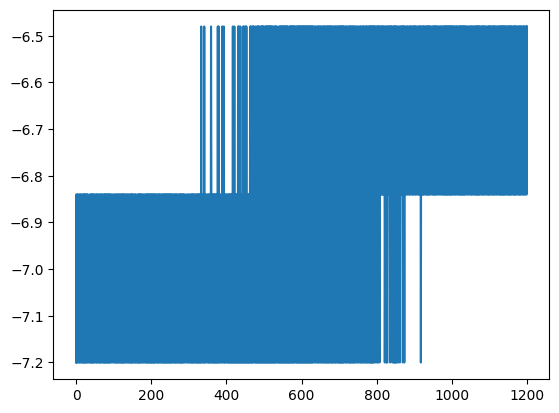

In [6]:
timeoffset = float(scope.query(":TIM:OFFS?")[0])
voltscale = float(scope.query(":CHAN1:SCAL?")[0])
voltoffset = float(scope.query(":CHAN1:OFFS?")[:-1])

scope = rm.open_resource(usb[0], timeout = 200, chunk_size=1024000)
scope.write(":WAV:POIN:MODE RAW")
scope.write(":WAV:DATA? CHAN1")

rawdata = scope.read_raw() #Read the block of data
#print(rawdata)
rawdata = rawdata[10 :] #Drop the heading

data_size = len(rawdata)
data = np.frombuffer(rawdata, 'B')
data = data * -1 + 255
data = (data -130.0 - voltoffset/voltscale*25) / 25 * voltscale
plt.plot(data[1:-1])